<a href="https://colab.research.google.com/github/yatharthsol090/All-Codes/blob/main/Birdsong_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import librosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install audiomentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0.post2
    Uninstalling librosa-0.10.0.post2:
      Successfully uninstalled librosa-0.10.0.post2


In [ ]:
from audiomentations import *

In [ ]:
# Installing audio processing packages
# !sudo apt-get -y install libsndfile1
# !pip install librosa
!pip install pydub

# getting requirements to an external txt file
# !conda list --export > package-list.txt
# !conda create -n myenv --file package-list.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import zipfile
from IPython.display import Audio
from pydub import AudioSegment
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import pickle
import random
from tqdm import tqdm
import datetime
!pip install audiomentations 
from audiomentations import *
import multiprocessing
import cv2
# # library used to process the audio files
import librosa
import librosa.display
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow as tf
!pip install tensorflow_addons
import tensorflow_addons as tfa
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, Conv2D, Softmax, LSTM, Embedding, concatenate
from tensorflow.keras.layers import Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, InceptionV3, VGG16
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping
from IPython.display import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 6.8 MB/s eta 0:00:00


In [ ]:
# loading train data
train_df = pd.read_csv('/content/drive/MyDrive/birdsong-classification2/birdsong-recognition/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/birdsong-classification2/birdsong-recognition/test.csv')
train_df.tail(3)

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
21372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip install pandas
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_df.drop(train_df.index[6241:], inplace = True)
train_df.tail(3)

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
6238,0.0,no,comloo,1 (mono),27-07-2018,Not specified,4.0,XC488030.mp3,Not specified,Common Loon,...,488030.0,https://www.xeno-canto.org/488030,Iceland,Stanislas Wroza,Gavia immer_Common Loon,-17.3637,Not specified,06:00,Stanislas Wroza,Creative Commons Attribution-NonCommercial-Sha...
6239,0.0,no,comloo,2 (stereo),01-07-2019,Not specified,11.0,XC488506.mp3,Not specified,Common Loon,...,488506.0,https://www.xeno-canto.org/488506,Canada,Aidan Place,Gavia immer_Common Loon,-78.6967,Not specified,06:30,Aidan Place,Creative Commons Attribution-NonCommercial-Sha...
6240,0.0,no,comloo,2 (stereo),27-08-2019,Not specified,5.0,XC501014.mp3,Not specified,Common Loon,...,501014.0,https://www.xeno-canto.org/501014,Portugal,Jorge Leitão,Gavia immer_Common Loon,-8.6693,Not specified,20:17,Jorge Leitão,Creative Commons Attribution-NonCommercial-Sha...


In [ ]:
# Checking the unique types of bird species in the data
print(len(next(os.walk('/content/drive/MyDrive/birdsong-classification2/birdsong-recognition/train_audio/'))[1]))

75


In [ ]:
y_labels = train_df['ebird_code'].unique()
print("Bird species in abbrebviated: ",y_labels[:5])
print("BIrd Speccies: ",train_df['species'].unique()[:5])

Bird species in abbrebviated:  ['aldfly' 'ameavo' 'amebit' 'amecro' 'amegfi']
BIrd Speccies:  ['Alder Flycatcher' 'American Avocet' 'American Bittern' 'American Crow'
 'American Goldfinch']


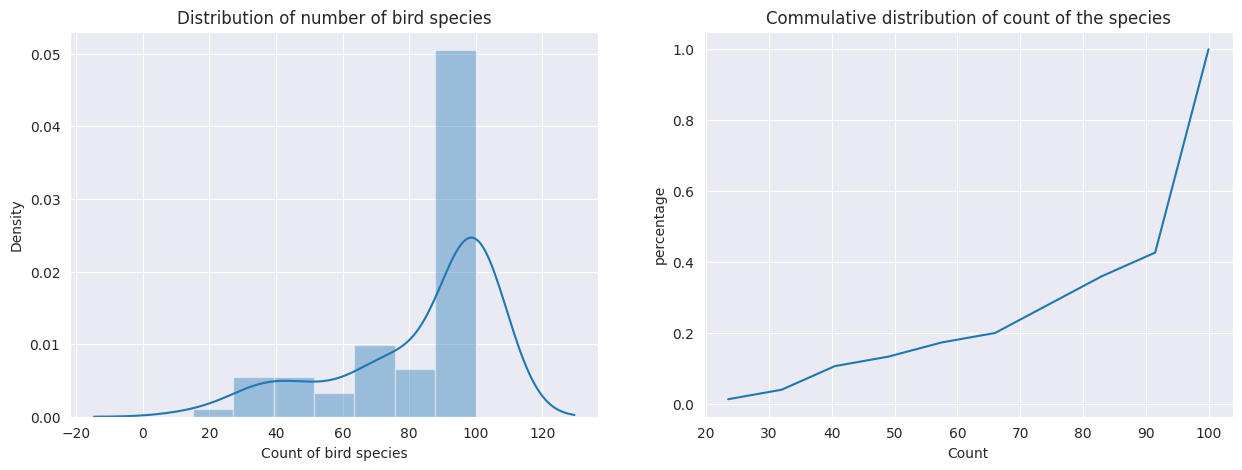

In [ ]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.distplot(train_df.species.value_counts(),ax=ax1)
ax1.set_title("Distribution of number of bird species")
ax1.set_xlabel("Count of bird species")

counts, bin_edges = np.histogram(train_df.species.value_counts(), bins=10, density = True)

# plotting cdf 
# https://stackoverflow.com/questions/10640759/how-to-get-the-cumulative-distribution-function-with-numpy
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
ax2 = fig.add_subplot(122)
ax2.plot(bin_edges[1:], cdf)
ax2.set_title("Commulative distribution of count of the species")
ax2.set_xlabel("Count")
ax2.set_ylabel("percentage")
plt.show()

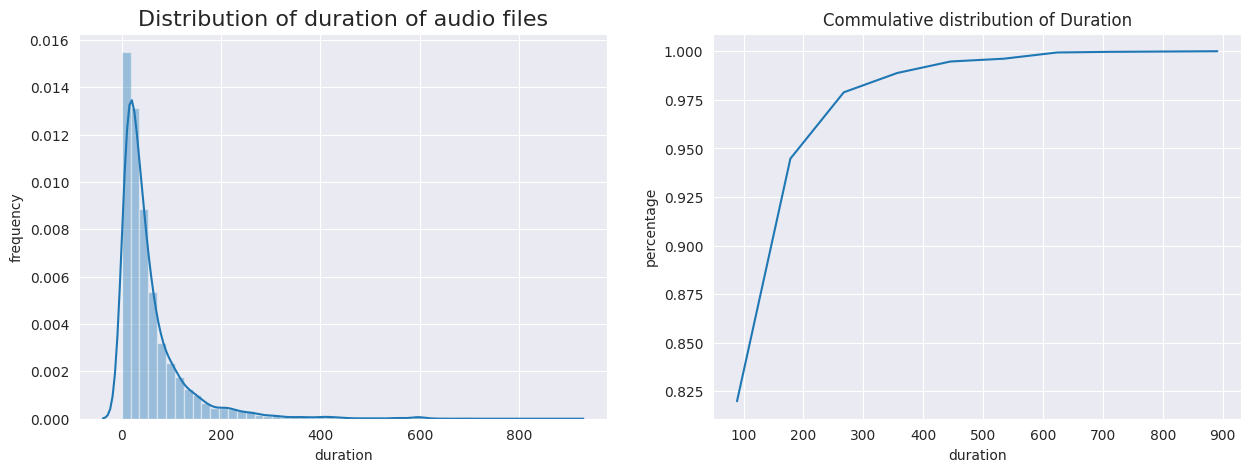

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.distplot.html
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.distplot(train_df['duration'], ax=ax1)
ax1.set_title("Distribution of duration of audio files", fontsize=16)
ax1.set_ylabel("frequency")

counts, bin_edges = np.histogram(train_df['duration'], bins=10, density = True)

# plotting cdf 
# https://stackoverflow.com/questions/10640759/how-to-get-the-cumulative-distribution-function-with-numpy
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
ax2 = fig.add_subplot(122)
ax2.plot(bin_edges[1:], cdf)
ax2.set_title("Commulative distribution of Duration")
ax2.set_xlabel("duration")
ax2.set_ylabel("percentage")
plt.show()

In [ ]:
filepath = []
for x in os.walk('/content/drive/MyDrive/birdsong-classification2/birdsong-recognition/train_audio'):
    for y in x[2]:
        filepath.append(x[0] + '/' + y)

In [ ]:
# adding full file path of the audios to the dataframe
train_df['filepath'] = filepath
train_df.tail(2)

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,url,country,author,primary_label,longitude,length,time,recordist,license,filepath
6239,0.0,no,comloo,2 (stereo),01-07-2019,Not specified,11.0,XC488506.mp3,Not specified,Common Loon,...,https://www.xeno-canto.org/488506,Canada,Aidan Place,Gavia immer_Common Loon,-78.6967,Not specified,06:30,Aidan Place,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong-classification...
6240,0.0,no,comloo,2 (stereo),27-08-2019,Not specified,5.0,XC501014.mp3,Not specified,Common Loon,...,https://www.xeno-canto.org/501014,Portugal,Jorge Leitão,Gavia immer_Common Loon,-8.6693,Not specified,20:17,Jorge Leitão,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong-classification...


In [ ]:
# let us take the call of ALder FLycatcher
aldfly = train_df[train_df['ebird_code'] == "aldfly"].sample(5, random_state = 45)['filepath'].values
# let us hear the call
rate = 44100
data = np.random.uniform(-1, 1, rate) # 1 second worth of random samples between -1 and 1
scaled = np.int16(data / np.max(np.abs(data)) * 32767)
Audio(aldfly[1])
# aldfly

In [ ]:
train_df

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,url,country,author,primary_label,longitude,length,time,recordist,license,filepath
0,3.5,no,aldfly,1 (mono),25-05-2013,Not specified,25.0,XC134874.mp3,Not specified,Alder Flycatcher,...,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,08:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,/content/drive/MyDrive/birdsong-classification...
1,4.0,no,aldfly,2 (stereo),27-05-2013,both,36.0,XC135454.mp3,both,Alder Flycatcher,...,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong-classification...
2,4.0,no,aldfly,2 (stereo),27-05-2013,both,39.0,XC135455.mp3,both,Alder Flycatcher,...,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong-classification...
3,3.5,no,aldfly,2 (stereo),27-05-2013,both,33.0,XC135456.mp3,both,Alder Flycatcher,...,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong-classification...
4,4.0,no,aldfly,2 (stereo),27-05-2013,both,36.0,XC135457.mp3,level,Alder Flycatcher,...,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong-classification...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6236,0.0,no,comloo,1 (mono),27-07-2018,Not specified,3.0,XC488028.mp3,Not specified,Common Loon,...,https://www.xeno-canto.org/488028,Iceland,Stanislas Wroza,Gavia immer_Common Loon,-17.3637,Not specified,06:00,Stanislas Wroza,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong-classification...
6237,0.0,no,comloo,1 (mono),27-07-2018,Not specified,80.0,XC488029.mp3,Not specified,Common Loon,...,https://www.xeno-canto.org/488029,Iceland,Stanislas Wroza,Gavia immer_Common Loon,-17.3637,Not specified,06:00,Stanislas Wroza,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong-classification...
6238,0.0,no,comloo,1 (mono),27-07-2018,Not specified,4.0,XC488030.mp3,Not specified,Common Loon,...,https://www.xeno-canto.org/488030,Iceland,Stanislas Wroza,Gavia immer_Common Loon,-17.3637,Not specified,06:00,Stanislas Wroza,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong-classification...
6239,0.0,no,comloo,2 (stereo),01-07-2019,Not specified,11.0,XC488506.mp3,Not specified,Common Loon,...,https://www.xeno-canto.org/488506,Canada,Aidan Place,Gavia immer_Common Loon,-78.6967,Not specified,06:30,Aidan Place,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong-classification...


In [ ]:
# checking how the librosa library process audio files
samples, sample_rate = librosa.load(aldfly[1], sr=44100)
print("Audio file processed sample: ",np.random.choice(samples, 10))
print("Shape of the aray in which audio file loaded:",samples.shape)
print("Sample_rate(KHz) at which audio is processed: ",sample_rate)

# Verify length of the audio
print('Check Len of Audio:',librosa.get_duration(samples,sample_rate))

Audio file processed sample:  [ 0.01341045  0.02194661 -0.01838262  0.00311825  0.03935909 -0.01263044
 -0.05667467  0.10474004 -0.00462787 -0.00094256]
Shape of the aray in which audio file loaded: (767232,)
Sample_rate(KHz) at which audio is processed:  44100
Check Len of Audio: 17.397551020408162


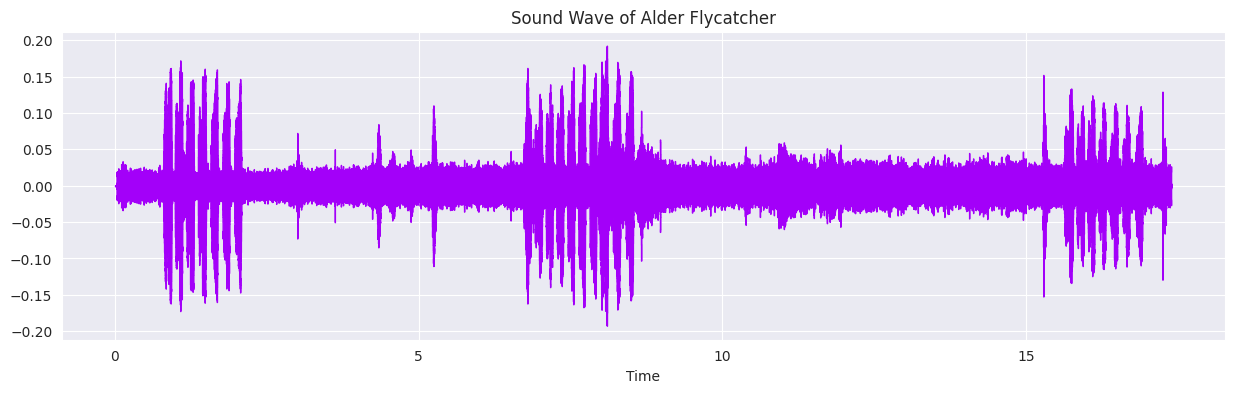

In [ ]:
plt.figure(figsize=(15,4))
plt.title('Sound Wave of Alder Flycatcher', fontsize=12)
librosa.display.waveshow(y = samples, sr = sample_rate, color = "#A300F9")
plt.show()

In [ ]:
# https://musicinformationretrieval.com/stft.html
hop_length = 512 # frame increment
n_fft = 2048 # frame size
X = np.abs(librosa.stft(samples, n_fft=n_fft, hop_length=hop_length))
X.shape

(1025, 1499)

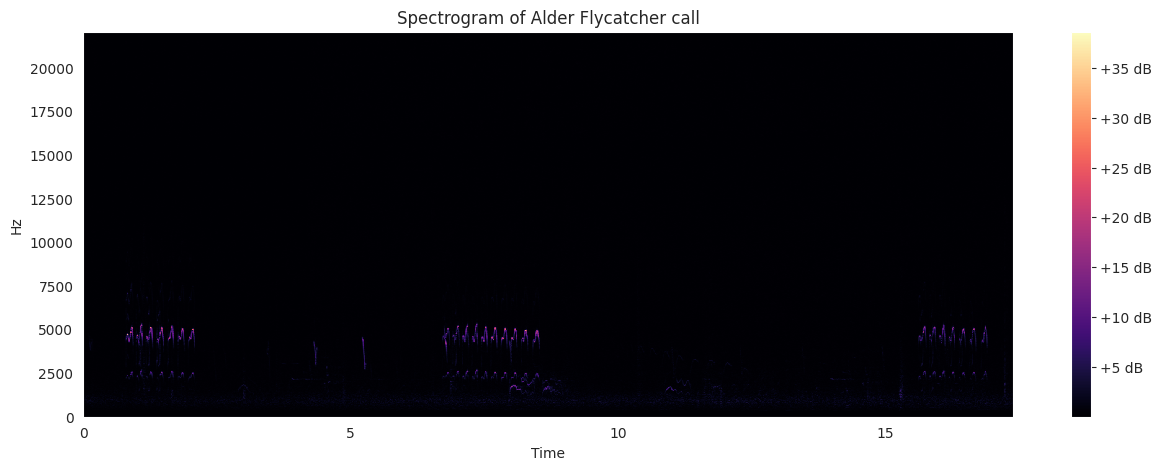

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(X, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of Alder Flycatcher call")
plt.show()

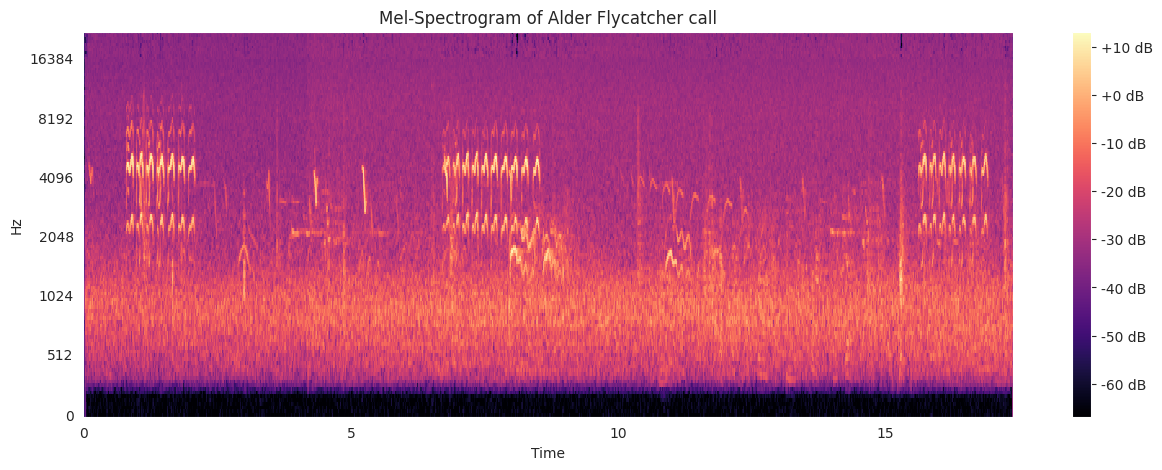

In [ ]:
# getting mel spectrogram using librosa melspectrogram feature
mel_spectrogram = librosa.feature.melspectrogram(samples, sr=sample_rate, n_fft=n_fft, hop_length=hop_length)

# transforming to mel scale
mel_scale = librosa.power_to_db(abs(mel_spectrogram))

# Now, we have spectroagram in mathematical form let us plot the spectrogram using librosa.display.specshow.
plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_scale, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram of Alder Flycatcher call")
plt.show()

In [ ]:
audio_file, _ = librosa.effects.trim(samples)

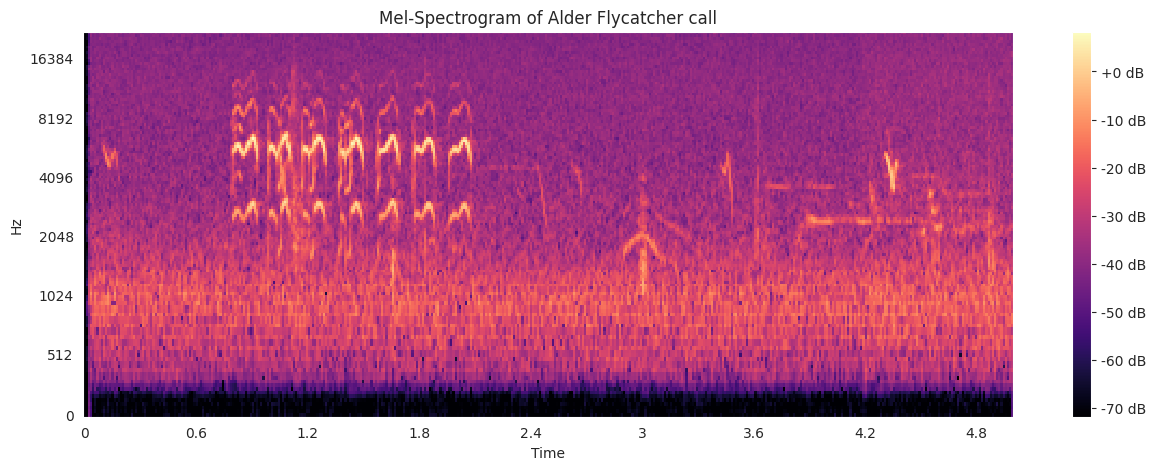

In [ ]:
n_fft=1024
hop_length=512
sample_rate = 44100

mel = librosa.feature.melspectrogram(audio_file[:sample_rate*5], 44100, n_mels=128, n_fft=1024, hop_length=512, fmin=20, fmax=16000)
# transforming to mel scale
mel_scale = librosa.power_to_db(abs(mel))

plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_scale, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram of Alder Flycatcher call")
plt.show()

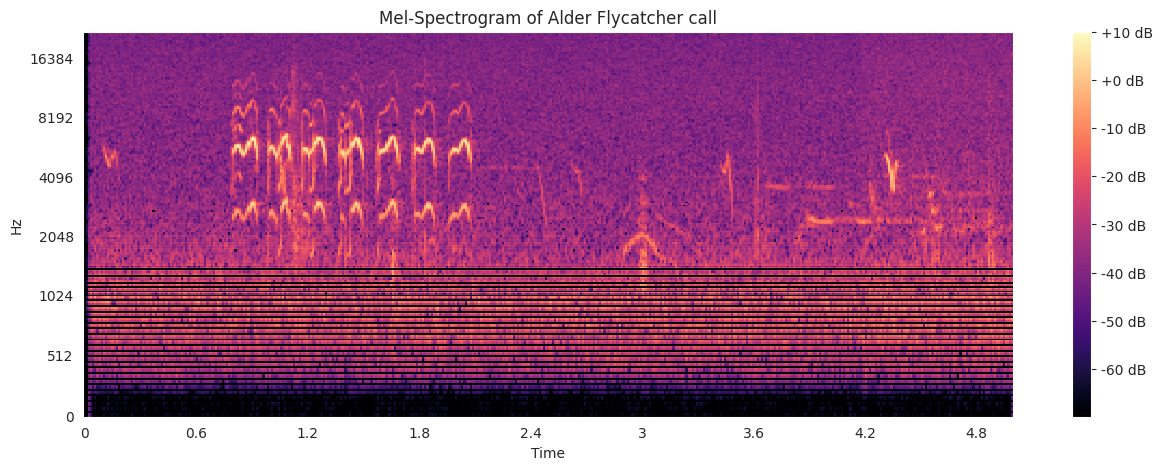

In [ ]:
n_fft=1024
hop_length=512
sample_rate = 44100
mel = librosa.feature.melspectrogram(audio_file[:44100*5], 44100, n_mels=256, n_fft=1024, hop_length=512, fmin=20, fmax=16000)
# transforming to mel scale
mel_scale = librosa.power_to_db(abs(mel))

plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_scale, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram of Alder Flycatcher call")
plt.show()

In [ ]:
# dataframe containg the path to the audio files and the class labels
df_audio = train_df[['filename','filepath','duration','sampling_rate','ebird_code']]
df_audio.to_csv('/content/drive/MyDrive/birdsong-classification2/birdsong-recognition/df_audio.csv',index=False)
df_audio = pd.read_csv('/content/drive/MyDrive/birdsong-classification2/birdsong-recognition/df_audio.csv')

df_audio.head(2)

,filename,filepath,duration,sampling_rate,ebird_code
0,XC134874.mp3,/content/drive/MyDrive/birdsong-classification...,25.0,48000 (Hz),aldfly
1,XC135454.mp3,/content/drive/MyDrive/birdsong-classification...,36.0,44100 (Hz),aldfly


In [ ]:
#split the data into train and validation and save in X_train, X_cv, y_train, y_cv
#use stratify sampling,random state of 45 and validaton size of 30%
X_train, X_test, y_train, y_test = train_test_split(df_audio,df_audio.ebird_code,test_size=0.3, 
                                                    random_state=45,stratify=df_audio.ebird_code)

print("Training data: ",X_train.shape,y_train.shape)
print("Validataion data: ",X_test.shape,y_test.shape)

Training data:  (4368, 5) (4368,)
Validataion data:  (1873, 5) (1873,)


In [ ]:
X_train.head()

,filename,filepath,duration,sampling_rate,ebird_code
326,XC217005.mp3,/content/drive/MyDrive/birdsong-classification...,41.0,44100 (Hz),amegfi
2462,XC297533.mp3,/content/drive/MyDrive/birdsong-classification...,14.0,44100 (Hz),bktspa
5770,XC31038.mp3,/content/drive/MyDrive/birdsong-classification...,46.0,48000 (Hz),chswar
1673,XC452183.mp3,/content/drive/MyDrive/birdsong-classification...,14.0,48000 (Hz),belkin1
5845,XC121020.mp3,/content/drive/MyDrive/birdsong-classification...,12.0,44100 (Hz),clanut


In [ ]:
bird_species_mapping = dict(zip(train_df['ebird_code'],train_df['species']))
# Integer coding the class labels
ebird_code_labeled = dict()
ebird_code_classes = dict()

ebird_code_labeled['nocall'] = 0
ebird_code_classes[0] = 'nocall'
for i, bird in enumerate(df_audio['ebird_code'].unique()):
    ebird_code_labeled[bird] = i+1
    ebird_code_classes[i+1] = bird
    
# pickle.dump((bird_species_mapping,ebird_code_labeled,ebird_code_classes), open('model_logs/bird_species_code.pkl','wb'))

In [ ]:
print(ebird_code_labeled)

{'nocall': 0, 'aldfly': 1, 'ameavo': 2, 'amebit': 3, 'amecro': 4, 'amegfi': 5, 'amekes': 6, 'amepip': 7, 'amered': 8, 'amerob': 9, 'amewig': 10, 'amewoo': 11, 'amtspa': 12, 'annhum': 13, 'astfly': 14, 'baisan': 15, 'baleag': 16, 'balori': 17, 'banswa': 18, 'barswa': 19, 'bawwar': 20, 'belkin1': 21, 'belspa2': 22, 'bewwre': 23, 'bkbcuc': 24, 'bkbmag1': 25, 'bkbwar': 26, 'bkcchi': 27, 'bkchum': 28, 'bkhgro': 29, 'bkpwar': 30, 'bktspa': 31, 'blkpho': 32, 'blugrb1': 33, 'blujay': 34, 'bnhcow': 35, 'boboli': 36, 'bongul': 37, 'brdowl': 38, 'brebla': 39, 'brespa': 40, 'brncre': 41, 'brnthr': 42, 'brthum': 43, 'brwhaw': 44, 'btbwar': 45, 'btnwar': 46, 'btywar': 47, 'buffle': 48, 'buggna': 49, 'buhvir': 50, 'bulori': 51, 'bushti': 52, 'buwtea': 53, 'buwwar': 54, 'cacwre': 55, 'calgul': 56, 'calqua': 57, 'camwar': 58, 'cangoo': 59, 'canwar': 60, 'canwre': 61, 'carwre': 62, 'casfin': 63, 'caster1': 64, 'casvir': 65, 'cedwax': 66, 'chispa': 67, 'chiswi': 68, 'chswar': 69, 'chukar': 70, 'clanut': 

In [ ]:
# sampling audio to 5 seconds length
def raw_data(filename,bird_code,raw_df):
    sample_rate = 44100
    try:
        samples, sample_rate = librosa.load(filename,sr=44100)
    except:
        sound = AudioSegment.from_file(filename)
        samples = sound.get_array_of_samples()
        new_sound = sound._spawn(samples)
        samples = np.array(samples).astype(np.float32)

    samples, _ = librosa.effects.trim(samples)
    data_point_per_second = 10
    
    #Take 10 data points every second
    samples = samples[0::int(sample_rate/data_point_per_second)]
    #We normalize each sample before extracting 5s samples from it
    normalized_sample = sklearn.preprocessing.minmax_scale(samples, axis=0)
    
    #only take 5s samples and add them to the dataframe
    song_sample = []
    sample_length = 5*data_point_per_second
    for idx in range(0,len(normalized_sample),sample_length): 
        song_sample = normalized_sample[idx:idx+sample_length]
        if len(song_sample)>=sample_length:
            raw_df = raw_df.append({"song_samples":np.asarray(song_sample).astype(np.float32),
                                            "bird_code":ebird_code_labeled[bird_code]}, ignore_index=True)
    return raw_df

In [ ]:
raw_df = pd.DataFrame(columns=["song_samples","bird_code"])
for i, row in tqdm(df_audio[['filepath','ebird_code']][3744:].iterrows()):
    raw_df = raw_data(row.filepath, row.ebird_code, raw_df)
    
raw_df.to_csv('/content/drive/MyDrive/birdsong-classification2/raw_df.csv',index=False)

2383it [1:00:04,  1.50s/it]

In [ ]:
# stacking the image to 3 channels for CNN models
def mono_to_color(X: np.ndarray, mean=None, std=None, norm_max=None, norm_min=None, eps=1e-6):
    """Code from https://www.kaggle.com/daisukelab/creating-fat2019-preprocessed-data"""
    # Stack X as [X,X,X]
    X = np.stack([X, X, X], axis=-1)

    # Standardize
    mean = mean or X.mean()
    X = X - mean
    std = std or X.std()
    Xstd = X / (std + eps)
    _min, _max = Xstd.min(), Xstd.max()
    norm_max = norm_max or _max
    norm_min = norm_min or _min
    if (_max - _min) > eps:
        # Normalize to [0, 255]
        V = Xstd
        V[V < norm_min] = norm_min
        V[V > norm_max] = norm_max
        V = 255 * (V - norm_min) / (norm_max - norm_min)
        V = V.astype(np.uint8)
    else:
        # Just zero
        V = np.zeros_like(Xstd, dtype=np.uint8)
    return V

In [ ]:
 # sampling audio to 5 seconds length
def spectrogram_images(filename,bird_code):
    sample_rate = 44100
    try:
        samples, sample_rate = librosa.load(filename,sr=44100)
    except:
        sound = AudioSegment.from_file(filename)
        samples = sound.get_array_of_samples()
        new_sound = sound._spawn(samples)
        samples = np.array(samples).astype(np.float32)

    samples, _ = librosa.effects.trim(samples)
    
    #only take 5s samples and save them to the np array
    sample_length = 5*sample_rate
    X = np.abs(librosa.stft(samples[:44100*5], n_fft=1024, hop_length=512))
    spectrogram = librosa.amplitude_to_db(X)
    image = mono_to_color(spectrogram)

    res = cv2.resize(image, (224, 224))
    res = (res / 255.0).astype(np.float32)
    res = np.asarray(res)
    
    incep = cv2.resize(image, (299, 299))
    incep = (incep / 255.0).astype(np.float32)
    incep = np.asarray(incep)
    
    label = ebird_code_labeled[bird_code]
    
    return spectrogram,res,incep,label


def func(start,end,idx):
    labels = []
    img_res = []
    img_incep = []
    spec = []

    for i, row in X_train[['filepath','ebird_code']][start*idx:end*(idx+1)].iterrows():
        mel_spec,res,incep,label = spectrogram_images(row.filepath, row.ebird_code)
        spec.extend(mel_spec)
        img_res.append(res)
        img_incep.append(incep)
        labels.append(label)
    
    # stroing the data as npz file for easy access
    np.savez_compressed('/content/drive/MyDrive/birdsong-classification2/processed_data/VGG/STFT/train/images_data'+str(idx),a=spec,b=labels)
    np.savez_compressed('/content/drive/MyDrive/birdsong-classification2/processed_data/ResNet/tr/images_data'+str(idx),a=img_res,b=labels)
    np.savez_compressed('/content/drive/MyDrive/birdsong-classification2/processed_data/Inception/tr/images_data'+str(idx),a=img_incep,b=labels)
    np.savez_compressed('/content/drive/MyDrive/birdsong-classification2/processed_data/spec_data/tr/images_data'+str(idx),a=spec,b=labels)
    
def func1(start,end,idx):
    labels = []
    img_res = []
    img_incep = []
    spec = []

    for i, row in X_test[['filepath','ebird_code']][start*idx:end*(idx+1)].iterrows():
        mel_spec,res,incep,label = spectrogram_images(row.filepath, row.ebird_code)
        spec.extend(mel_spec)
        img_res.append(res)
        img_incep.append(incep)
        labels.append(label)
        
    np.savez_compressed('/content/drive/MyDrive/birdsong-classification2/processed_data/VGG/STFT/validation/images_data'+str(idx),a=spec,b=labels)    
    np.savez_compressed('/content/drive/MyDrive/birdsong-classification2/processed_data/ResNet/val/images_data'+str(idx),a=img_res,b=labels)
    np.savez_compressed('/content/drive/MyDrive/birdsong-classification2/processed_data/Inception/val/images_data'+str(idx),a=img_incep,b=labels)
    np.savez_compressed('/content/drive/MyDrive/birdsong-classification2/processed_data/spec_data/val/images_data'+str(idx),a=spec,b=labels)

In [ ]:
for i in tqdm(range(0,535,8)):
    if i != 528:
        p1 = multiprocessing.Process(target=func, args=(32,32,i))
        p2 = multiprocessing.Process(target=func, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func, args=(32,32,i+5))
        p7 = multiprocessing.Process(target=func, args=(32,32,i+6))
        p8 = multiprocessing.Process(target=func, args=(32,32,i+7))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()
        p7.start()
        p8.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()
        p7.join()
        p8.join()
    else:
        p1 = multiprocessing.Process(target=func, args=(32,32,i))
        p2 = multiprocessing.Process(target=func, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func, args=(32,32,i+5))
        p7 = multiprocessing.Process(target=func, args=(32,32,i+6))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()
        p7.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()
        p7.join()

In [ ]:
for i in tqdm(range(0,134,8)):
    if i != 128:
        p1 = multiprocessing.Process(target=func1, args=(32,32,i))
        p2 = multiprocessing.Process(target=func1, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func1, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func1, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func1, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func1, args=(32,32,i+5))
        p7 = multiprocessing.Process(target=func1, args=(32,32,i+6))
        p8 = multiprocessing.Process(target=func1, args=(32,32,i+7))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()
        p7.start()
        p8.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()
        p7.join()
        p8.join()
    else:
        p1 = multiprocessing.Process(target=func1, args=(32,32,i))
        p2 = multiprocessing.Process(target=func1, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func1, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func1, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func1, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func1, args=(32,32,i+5))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()

In [ ]:
# checking the data after pre-processing
img = np.load('/content/drive/MyDrive/birdsong-classification2/processed_data/VGG/STFT/train/images_data0.npz')
print("Spec images data: ",img['a'].shape,img['b'].shape)
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.imshow(img['a'][0])
# Checking the 5 seconds spectrogram generated
spec = np.load('processed_data/spec_data/train/images_data0.npz')
print("Spec data: ",spec['a'][0].shape,spec['b'][:1].shape)
plt.subplot(1,2,2)
librosa.display.specshow(spec['a'][0], sr=44100, hop_length=512, x_axis='time', y_axis='mel')

FileNotFoundError: ignored

In [ ]:
# defining the metrics and callbacks
NUM_CLASSES = len(ebird_code_classes.keys())

# loss function to minimize
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction='none')

def loss_function(y_true, y_pred):
    loss_ = loss_object(y_true, y_pred)

    return tf.reduce_mean(loss_)

# def f1(y_true, y_pred, threshold=0.5, avg="samples"):
#     """
#     The f1 metric for the problem
#     Arguments:
#         truth {np array [N] or [N x C]} -- Ground truths
#         pred {np array [N x C]} -- Predicted probabilites
#     Keyword Arguments:
#         threshold {float} -- Threshold for classification (default: {0.5})
#         avg {str} -- How to perform average in the f1 score (default: {"samples"})
#     Returns:
#         float -- f1 score
#     """

#     if len(y_true.shape) == 1:
#         y_true = TARGETS[y_true]

#     y_pred = (y_pred > threshold).astype(int)

#     return f1_score(y_true, y_pred, average=avg)

# performance metric
fs = tfa.metrics.F1Score(num_classes=76,average="weighted",threshold=0.5)
acc = tf.keras.metrics.BinaryAccuracy(threshold=0.5)


def callbacks(log_file_path,model_path):
    # define callbacks for learning rate scheduling and best checkpoints saving
    log_dir1 = "models_multi_labels/logs/"+ log_file_path + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tbc1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir1,histogram_freq=1, write_graph=True,write_grads=True)
    md = ModelCheckpoint('models_multi_labels/'+ model_path +'.h5', monitor='val_loss', save_best_only=True, mode='min')
    rl = ReduceLROnPlateau(monitor='val_loss',patience=5)
    es = EarlyStopping(monitor='val_loss', patience=8)

    callbacks = [tbc1, md, rl,es]
    
    return callbacks

In [ ]:
def plot_summary(hist):
    """
    Function to plot the loss and accuracy per epoch
    """
    sns.set_style('darkgrid')
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss over epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')

    # plt.subplot(1,2,2)
    # plt.plot(hist.history['accuracy'])
    # plt.plot(hist.history['val_accuracy'])
    # plt.title('Accuracy over epochs')
    # plt.ylabel('Accuracy')
    # plt.xlabel('Epoch')
    # plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

In [ ]:
# reading samples data set
raw_df = pd.read_csv('/content/drive/MyDrive/birdsong-classification2/raw_df.csv')
raw_df.head()

,song_samples,bird_code
0,[0.48633698 0.28025514 0.546149 0.6007999 0...,45
1,[0.40049243 0.33844972 0. 0.45780867 0...,45
2,[0.47050303 0.49764022 0.4899039 0.26931268 0...,45
3,[0.49529073 0.3637019 0.82500494 0.50016445 0...,45
4,[0.3207872 0.3292321 0.27316886 0.3689923 0...,45


In [ ]:
song_samples = raw_df.song_samples
y = raw_df.bird_code

X = []
for samples in song_samples:
    a = ','.join([i.strip('[]') for i in samples.strip().split()])
    a = np.fromstring(a, dtype=np.float, sep=',' )
    X.append(a)

X = np.asarray(X)

# split the data into train and validation and save in X_train, X_cv, y_train, y_cv
# use stratify sampling,random state of 45 and validaton size of 20%
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)

print("Training data: ",X_tr.shape,y_tr.shape)
print("Validataion data: ",X_te.shape,y_te.shape)

Training data:  (20708, 50) (20708,)
Validataion data:  (5177, 50) (5177,)


In [ ]:
sequence_length = 50
training_size = X_tr.shape[0]
validation_size = X_te.shape[0]

# Training set
X_tr = np.reshape(X_tr,(training_size,1,sequence_length))
y_tr = to_categorical(y_tr, num_classes=len(ebird_code_classes.keys()), dtype='float32' )

# Validation set
X_te = np.reshape(X_te,(validation_size,1,sequence_length))
y_te = to_categorical(y_te, num_classes=len(ebird_code_classes.keys()), dtype='float32')

print("Training data: ",X_tr.shape,y_tr.shape)
print("Validataion data: ",X_te.shape,y_te.shape)

Training data:  (20708, 1, 50) (20708, 76)
Validataion data:  (5177, 1, 50) (5177, 76)


In [ ]:
input_layer = Input(shape=X_tr.shape[1:],name='input')
lstm_layer = LSTM(32, return_sequences=True, activation='tanh', recurrent_activation='sigmoid',
                  kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',name='lstm1')(input_layer)
bn1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, name='bn1')(lstm_layer)
lstm_2 = LSTM(32, activation='tanh', recurrent_activation='sigmoid', kernel_initializer='glorot_uniform', 
              recurrent_initializer='orthogonal', name='lstm2')(bn1)
dense1 = Dense(256, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(lstm_2)
dp = Dropout(0.3)(dense1)
output = Dense(NUM_CLASSES, activation="sigmoid")(dp)

model_lstm1 = Model(inputs=input_layer,outputs=output)
model_lstm1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1, 50)]           0         
                                                                 
 lstm1 (LSTM)                (None, 1, 32)             10624     
                                                                 
 bn1 (BatchNormalization)    (None, 1, 32)             128       
                                                                 
 lstm2 (LSTM)                (None, 32)                8320      
                                                                 
 dense1 (Dense)              (None, 256)               8448      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 76)                1953

In [ ]:
# Tuning the parmeters like optimizers, learning rate checking for overfitting/underfitting on a batch of data 
model_lstm1.compile(loss=loss_function, optimizer='sgd',metrics=[acc,fs])

model_lstm1.fit(X_tr[:32], y_tr[:32], epochs = 5, validation_data=(X_te[:32], y_te[:32]))

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.0551 - binary_accuracy: 0.9868 - f1_score: 0.0000e+00 - val_loss: 0.0556 - val_binary_accuracy: 0.9868 - val_f1_score: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 49ms/step - loss: 0.0552 - binary_accuracy: 0.9868 - f1_score: 0.0000e+00 - val_loss: 0.0557 - val_binary_accuracy: 0.9868 - val_f1_score: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 58ms/step - loss: 0.0545 - binary_accuracy: 0.9868 - f1_score: 0.0000e+00 - val_loss: 0.0557 - val_binary_accuracy: 0.9868 - val_f1_score: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 65ms/step - loss: 0.0550 - binary_accuracy: 0.9868 - f1_score: 0.0000e+00 - val_loss: 0.0557 - val_binary_accuracy: 0.9868 - val_f1_score: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 69ms/step - loss: 0.0545 - binary_accuracy: 0.9868 - f1_score: 0.0000e+00 - val_loss: 0.0557 - val_binary_accuracy: 0.9868 - val_f1_score: 0.0

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
callbacks = callbacks('fit1','raw_lstm')

model_lstm1.compile(loss=loss_function, optimizer=optim, metrics=[acc,fs])

hist1 = model_lstm1.fit(X_tr, y_tr, epochs = 50, batch_size = 32, validation_data=(X_te, y_te), 
                    callbacks=callbacks)

Epoch 1/50
648/648 [==============================] - 27s 19ms/step - loss: 0.0557 - binary_accuracy: 0.9868 - f1_score: 0.0000e+00 - val_loss: 0.0562 - val_binary_accuracy: 0.9868 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 2/50
648/648 [==============================] - 11s 17ms/step - loss: 0.0556 - binary_accuracy: 0.9868 - f1_score: 0.0000e+00 - val_loss: 0.0565 - val_binary_accuracy: 0.9868 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 3/50
648/648 [==============================] - 8s 12ms/step - loss: 0.0554 - binary_accuracy: 0.9868 - f1_score: 0.0000e+00 - val_loss: 0.0570 - val_binary_accuracy: 0.9868 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 4/50
648/648 [==============================] - 8s 12ms/step - loss: 0.0553 - binary_accuracy: 0.9868 - f1_score: 0.0000e+00 - val_loss: 0.0558 - val_binary_accuracy: 0.9868 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 5/50
648/648 [==============================] - 3s 5ms/step - loss: 0.0553 - binary_accuracy: 0.9868 - f1_score:

In [ ]:
model_lstm1.metrics_names

['loss', 'binary_accuracy', 'f1_score']

KeyError: ignored

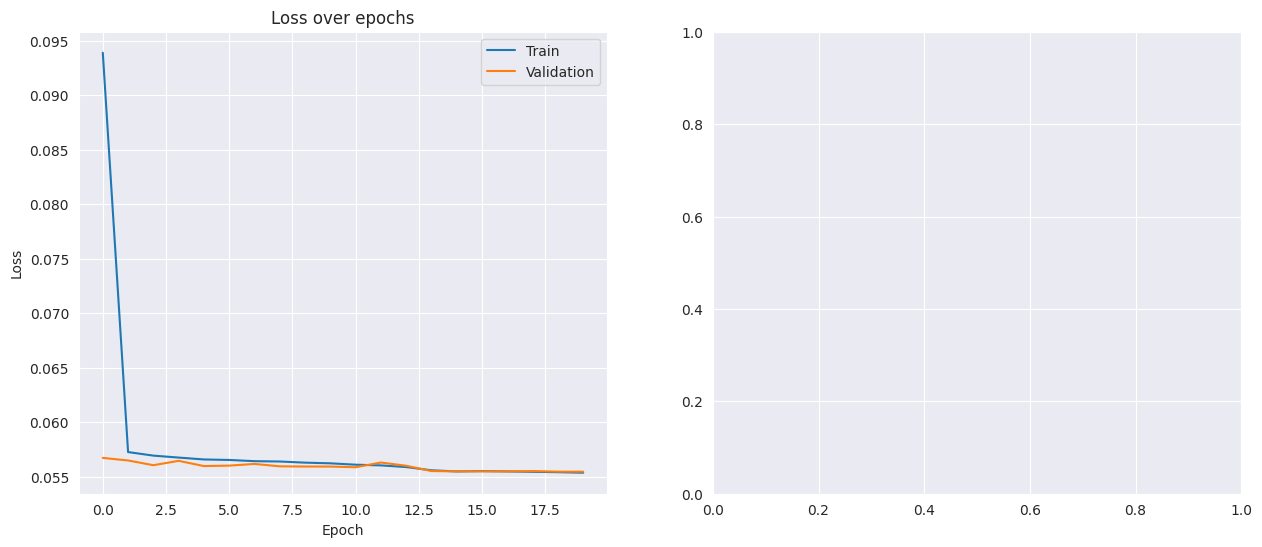

In [ ]:
plot_summary(hist1)